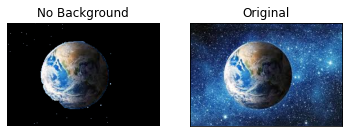

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Earth.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rectangle = (1,1,img.shape[0],img.shape[1])
# 600, 550, 1150, 2000
mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

image_rgd_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.subplot(121) ,plt.imshow(image_rgd_nobg), plt.axis('off')
plt.title("No Background"),plt.xticks([]),	plt.yticks([])
plt.subplot(122),
plt.imshow(image_rgb)
plt.title("Original"),plt.xticks([]),	plt.yticks([])

plt.show()